<a href="https://colab.research.google.com/github/sheikhi-a/Data_science_with_python/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#solve directly
import numpy as np
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot

data = array([
	[5, 12],
	[6, 13],
	[2, 11],
	[5, 14],
	[8, 17],
	])



X, Y = data[:,0], data[:,1]
X
Y

n=len(X)
n
X_bar = np.mean(X)
X_bar  #5.2
Y_bar = np.mean(Y)
Y_bar # 13.4
n*X_bar*Y_bar


numerator = np.sum(X  * Y )- n*X_bar*Y_bar
denominator = np.sum(X**2)- n*X_bar**2

#denominator = np.sum(X**2) - n*(X_mean)**2
beta_hat_1 = numerator / denominator
beta_hat_0= Y_bar - beta_hat_1 * X_bar

print("the regression equation is:   \n   ", "Y=",beta_hat_0, "+", beta_hat_1,"X" )

print("the regression equation  between study and score is:   \n   ", "Score=",beta_hat_0, "+", beta_hat_1,"study" )


the regression equation  between study and score is:   
    Score= 8.531914893617026 + 0.9361702127659565 study


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df=pd.DataFrame(data)
df.head()
df = df.rename(columns={0: 'X', 1: 'Y'}) # you may need inplace=True


x = df[['X']] #PREDICTOR
y =df['Y']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat1 = reg_model.coef_
alpha_hat1 = reg_model.intercept_


print("the regression equation is:      ", "Y=",alpha_hat1, "+", beta_hat1,"X" )



the regression equation is:       Y= 0.08215135794934386 + [0.78715288] X


In [ ]:

X = X.reshape((len(X), 1))  # reshape X  to a vector
X.shape

X = np.hstack((np.ones((X.shape[0], 1)), X))

X.shape

B = inv(X.T.dot(X)).dot(X.T).dot(y)
print(B)

print("the regression equation is:      ", "Y=",B[0], "+", B[1],"X1")


[0.08215136 0.78715288]
the regression equation is:       Y= 0.08215135794934367 + 0.7871528837351236 X1


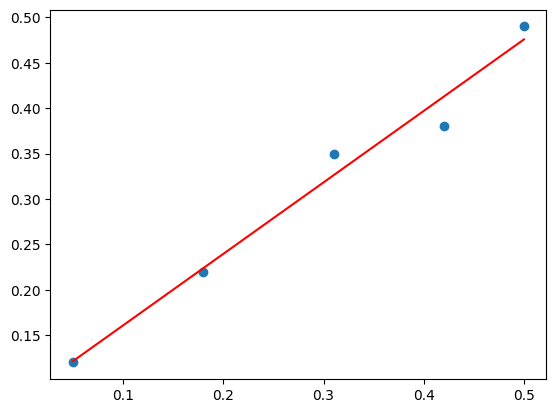

In [ ]:


yhat = X.dot(B)

pyplot.scatter(X[:,1], y)
pyplot.plot(X[:,1], yhat, color='red')
pyplot.show()

In [ ]:
from scipy.stats import pearsonr

corr = pearsonr(yhat, y)
corr

PearsonRResult(statistic=0.9887330769939926, pvalue=0.0014331990468207868)

In [ ]:
data = array([
	[0.05, 3, 0.12],
	[0.18, 4,  0.22],
	[0.31,8, 0.95],
	[0.42, 5, 0.38],
	[0.35,1,  0.49],
	])
X, y = data[:,0:2], data[:,2]
X = np.hstack((np.ones((X.shape[0], 1)), X))

X.shape

B = inv(X.T.dot(X)).dot(X.T).dot(y)
print(B)

print("the regression equation is:      ", "Y=",B[0], "+", B[1],"X1",'+', B[2], 'X2' )

import pandas as pd
yhat = X.dot(B)
# calculate the Pearson's correlation between two variables



array([[0.05, 3.  , 0.12],
       [0.18, 4.  , 0.22],
       [0.31, 8.  , 0.95],
       [0.42, 5.  , 0.38],
       [0.35, 1.  , 0.49]])

In [ ]:
df=pd.DataFrame(data)
df.head()
df = df.rename(columns={0: 'X1', 1: 'X2', 2: 'Y'}) # you may need inplace=True


x = df[['X1', 'X2']] #PREDICTOR
y =df['Y']# DEPENDENT

reg_model = LinearRegression()
reg_model.fit(x, y)

beta_hat1 = reg_model.coef_
alpha_hat1 = reg_model.intercept_


print("the regression equation is:   \n", "Y=",alpha_hat1, "+", beta_hat1,"X" )



the regression equation is:   
 Y= -0.11611542283212917 + [0.97502484 0.06968069] X


In [ ]:
data_new = array([
	[0.05, 6, 0.02],
	[0.11, 4,  0.5],
  [0.45, 8,  0.05]])

x_new=data_new[:,0:2]
y_new=data_new[:,2]

y_hat=reg_model.predict(x_new)
ss_test=np.sum((y_new-y_hat)**2)
ss_test

corr = pearsonr(y_hat, y_new)
corr

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PearsonRResult(statistic=-0.5564173349393764, pvalue=0.624351190232977)